train epoch:  0  batch index:  0 loss:  2.305091381072998
train epoch:  0  batch index:  10 loss:  2.238309621810913
train epoch:  0  batch index:  20 loss:  1.7251827716827393
train epoch:  0  batch index:  30 loss:  1.0322386026382446
train epoch:  0  batch index:  40 loss:  1.1528373956680298
train epoch:  0  batch index:  50 loss:  0.6570196747779846
train epoch:  0  batch index:  60 loss:  0.4302498996257782
train epoch:  0  batch index:  70 loss:  0.4099626839160919
train epoch:  0  batch index:  80 loss:  0.32397815585136414
train epoch:  0  batch index:  90 loss:  0.2640346884727478
train epoch:  0  batch index:  100 loss:  0.2792835831642151
train epoch:  0  batch index:  110 loss:  0.24163177609443665
epoch:  0 accuracy:  0.9269
train epoch:  1  batch index:  0 loss:  0.23994041979312897
train epoch:  1  batch index:  10 loss:  0.1863153725862503
train epoch:  1  batch index:  20 loss:  0.25541409850120544
train epoch:  1  batch index:  30 loss:  0.1978052407503128
train epoc

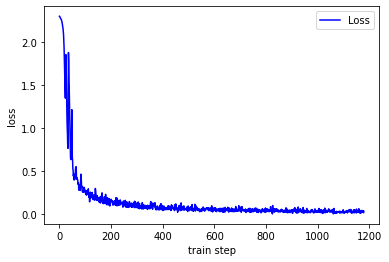

In [ ]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer 1: 1x28x28 -> 16x28x28   kernel size = 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        # convolution layer 1: 16x28x28 -> 32x28x28   kernel size = 3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.layer1 = nn.Linear(32*7*7, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer2(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_col.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect = []
accuracy_col = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect)

train epoch:  0  batch index:  0 loss:  2.3039236068725586
train epoch:  0  batch index:  10 loss:  2.288757085800171
train epoch:  0  batch index:  20 loss:  2.2624199390411377
train epoch:  0  batch index:  30 loss:  2.1174347400665283
train epoch:  0  batch index:  40 loss:  1.998319387435913
train epoch:  0  batch index:  50 loss:  2.846665859222412
train epoch:  0  batch index:  60 loss:  0.7179505228996277
train epoch:  0  batch index:  70 loss:  0.4108591377735138
train epoch:  0  batch index:  80 loss:  0.3712184429168701
train epoch:  0  batch index:  90 loss:  0.2860228717327118
train epoch:  0  batch index:  100 loss:  0.2974732518196106
train epoch:  0  batch index:  110 loss:  0.3052419126033783
epoch:  0 accuracy:  0.9275
train epoch:  1  batch index:  0 loss:  0.21462583541870117
train epoch:  1  batch index:  10 loss:  0.24847039580345154
train epoch:  1  batch index:  20 loss:  0.1641765683889389
train epoch:  1  batch index:  30 loss:  0.23183825612068176
train epoch:

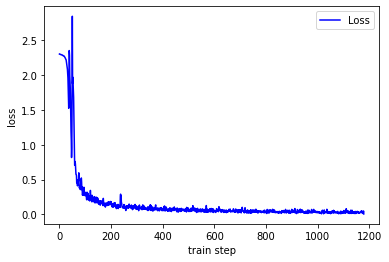

In [ ]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer 1: 1x28x28 -> 16x28x28   kernel size = 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        # convolution layer 1: 16x28x28 -> 32x28x28   kernel size = 3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.layer1 = nn.Linear(64*5*5, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer2(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_deep.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_deep.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_deep = []
accuracy_deep = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_deep)

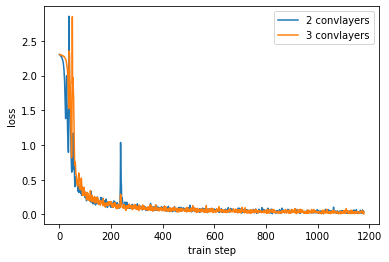

In [ ]:
plt.plot(range(len(loss_collect)), loss_collect, label="2 convlayers")
plt.legend()
plt.plot(range(len(loss_collect_deep)), loss_collect_deep, label="3 convlayers")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

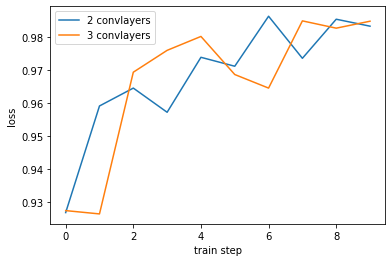

In [ ]:
plt.plot(range(len(accuracy_col)), accuracy_col, label="2 convlayers")
plt.legend()
plt.plot(range(len(accuracy_deep)), accuracy_deep, label="3 convlayers")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

train epoch:  0  batch index:  0 loss:  2.3049631118774414
train epoch:  0  batch index:  10 loss:  2.2219765186309814
train epoch:  0  batch index:  20 loss:  1.616757869720459
train epoch:  0  batch index:  30 loss:  0.938054621219635
train epoch:  0  batch index:  40 loss:  1.0043554306030273
train epoch:  0  batch index:  50 loss:  0.5943059325218201
train epoch:  0  batch index:  60 loss:  0.4308508634567261
train epoch:  0  batch index:  70 loss:  0.37582123279571533
train epoch:  0  batch index:  80 loss:  0.3707546889781952
train epoch:  0  batch index:  90 loss:  0.3281005918979645
train epoch:  0  batch index:  100 loss:  0.31907758116722107
train epoch:  0  batch index:  110 loss:  0.26858919858932495
epoch:  0 accuracy:  0.9106
train epoch:  1  batch index:  0 loss:  0.26385465264320374
train epoch:  1  batch index:  10 loss:  0.25875699520111084
train epoch:  1  batch index:  20 loss:  0.23208649456501007
train epoch:  1  batch index:  30 loss:  0.20864158868789673
train e

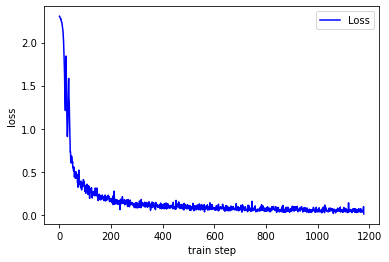

In [ ]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout =   True


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer 1: 1x28x28 -> 16x28x28   kernel size = 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        # convolution layer 1: 16x28x28 -> 32x28x28   kernel size = 3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.layer1 = nn.Linear(32*7*7, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer2(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_deep.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_col_deep.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_deep = []
accuracy_col_deep = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_deep)

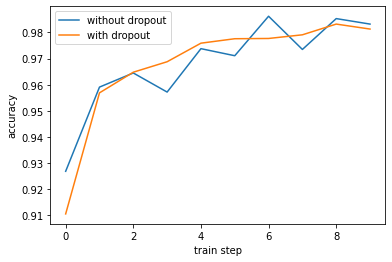

In [11]:
plt.plot(range(len(accuracy_col)), accuracy_col, label="without dropout")
plt.legend()
plt.plot(range(len(accuracy_col_deep)), accuracy_col_deep, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("accuracy")
plt.show()

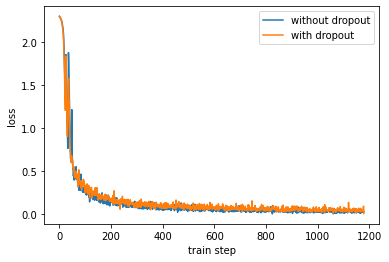

In [12]:
plt.plot(range(len(loss_collect)), loss_collect, label="without dropout")
plt.legend()
plt.plot(range(len(loss_collect_deep)), loss_collect_deep, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()